## Chess Predict
by Stefano Gatti

In [47]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
import bokeh as bok
import plotly as plo

In [48]:
df1= pd.read_csv("../data/cleaned_data_chess",index_col="N°")
df1.head(5)

,OraP,StatoF,ValoreA,BN,SerieP,Risultato
N°,,,,,,
1,9,R,761,B,1,S
2,10,R,803,B,1,S
3,14,M,798,B,1,V
4,19,M,771,N,1,V
5,19,M,728,B,2,S


In [49]:
df1['StatoF'].unique()

array(['R', 'M', 'S'], dtype=object)

In [50]:
len(df1)

77

In [51]:
df1[['StatoF','Risultato']].groupby('Risultato').count()

,StatoF
Risultato,
P,4
S,32
V,41


In [52]:
features=['OraP',
          'ValoreA',
          'SerieP']

categoricals= ['StatoF',
          'BN']

target = ['Risultato']

In [53]:
df1.columns.tolist()

['OraP', 'StatoF', 'ValoreA', 'BN', 'SerieP', 'Risultato']

In [54]:
pd.get_dummies(df1[categoricals]).sample(50).head()

,StatoF_M,StatoF_R,StatoF_S,BN_B,BN_N
N°,,,,,
35,1.0,0.0,0.0,1.0,0.0
25,0.0,0.0,1.0,0.0,1.0
10,0.0,1.0,0.0,0.0,1.0
43,1.0,0.0,0.0,0.0,1.0
23,0.0,0.0,1.0,1.0,0.0


In [55]:
dummy_categoricals = []
for categorical in categoricals:
    # Avoid the dummy variable trap!
    drop_var = sorted(df1[categorical].unique())[-1]
    temp_df1 = pd.get_dummies(df1[categorical], prefix=categorical)
    df1 = pd.concat([df1, temp_df1], axis=1)
    temp_df1.drop('_'.join([categorical, str(drop_var)]), axis=1, inplace=True)
    dummy_categoricals += temp_df1.columns.tolist()

# Costruiamo il modello

In [124]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error

In [125]:
train, test = train_test_split(df1, test_size=0.30)

In [126]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True)

In [127]:
rf.fit(train[features + dummy_categoricals], train[target])

/home/micio1970/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [128]:
rf.score(test[features + dummy_categoricals], test[target])

0.70833333333333337

In [130]:
rf.feature_importances_

array([ 0.21017895,  0.53064096,  0.11423155,  0.03989923,  0.02616957,
        0.07887974])

In [134]:
df1[features + dummy_categoricals].head(5)

,OraP,ValoreA,SerieP,StatoF_M,StatoF_R,BN_B
N°,,,,,,
1,9,761,1,0.0,1.0,1.0
2,10,803,1,0.0,1.0,1.0
3,14,798,1,1.0,0.0,1.0
4,19,771,1,1.0,0.0,0.0
5,19,728,2,1.0,0.0,1.0


In [38]:
df1.rename(columns=lambda x: x.replace(" ","_"),inplace=True)

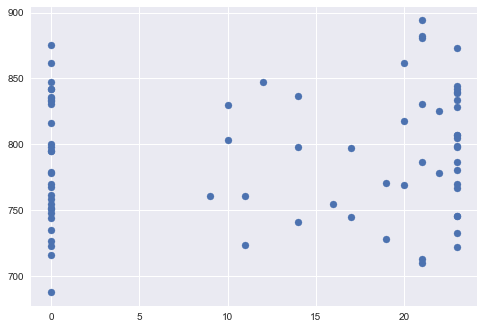

In [39]:
plt.scatter(df1.OraP,df1.ValoreA)

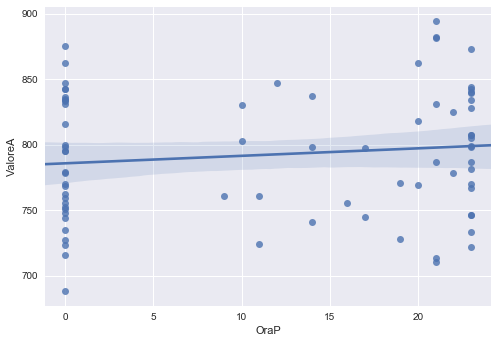

In [40]:
sns.regplot(df1.OraP,df1.ValoreA)
plt.savefig("../figures/2017-02-14"+"ValoreA Vs OraP")

In [41]:
df1[df1['ValoreA']>840]

,OraP,StatoF,ValoreA,BN,SerieP,Risultato,StatoF_M,StatoF_R,StatoF_S,BN_B,BN_N
N°,,,,,,,,,,,
16,23,S,873,N,1,S,0.0,0.0,1.0,0.0,1.0
24,0,S,842,B,1,V,0.0,0.0,1.0,1.0,0.0
32,23,S,842,N,3,S,0.0,0.0,1.0,0.0,1.0
35,21,M,894,B,1,S,1.0,0.0,0.0,1.0,0.0
36,21,M,882,N,2,S,1.0,0.0,0.0,0.0,1.0
38,0,S,847,B,2,S,0.0,0.0,1.0,1.0,0.0
42,21,M,881,N,1,V,1.0,0.0,0.0,0.0,1.0
51,12,R,847,N,1,S,0.0,1.0,0.0,0.0,1.0
60,0,S,875,B,1,S,0.0,0.0,1.0,1.0,0.0


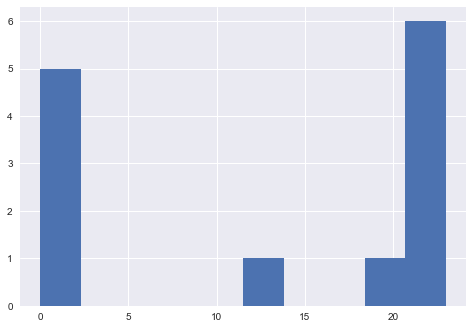

In [42]:
df1[df1['ValoreA']>840]['OraP'].hist()

In [1]:
for i in range(50):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
